#SKIimage打开、关闭、读取等基本的图像操作
主要内容来自于官方教程:
http://scikit-image.org/docs/stable/user_guide/

scikit-image需要numpy来进行工作

函数API：http://scikit-image.org/docs/stable/api/api.html

#1.Getting started

In [34]:
#必要的图像参数设置
%pylab inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [4]:
import skimage #导入该模块
from skimage import data #导入模块中提供的一些数据

camera = data.camera() #得到一幅图像
coins = data.coins()

#使用skimage.io.imread():可以加载自己的图像
from skimage import io
io.imread('3wolfmoon.jpg')

print type(camera),camera.shape #所有的skimage的图像都是使用numpy arrays 来进行表示的

<type 'numpy.ndarray'> (512L, 512L)


#2.A crash course on NumPy for images
skimage所有操作的图像都是Numpy数组，有很多处理图像的操作，都可以用Nummpy来完成。

In [6]:
#获取一些图像相关信息
print type(camera)
print camera.shape
print camera.size
print camera.dtype

<type 'numpy.ndarray'>
(512L, 512L)
262144
uint8


In [16]:
#计算一些统计数据
print camera.min()
print camera.max()
print camera.mean()
print len(camera[0])
print len(camera[1])
nrows, ncols = camera.shape

0
255
118.313392639
512
512


Numpy可以通过多种类型的数据表示图像，参考：

http://scikit-image.org/docs/stable/user_guide/data_types.html#data-types

In [12]:
#访问图像元素
camera[10,0]
#设置图像元素
camera[3, 10] = 0
#第一维表示行的索引，第二维表示列的索引，索引从左上角开始计算。
#这与矩阵和线性代数的表示方式一致，但是和笛卡尔坐标的表示方式相反

坐标相关内容参考：http://scikit-image.org/docs/stable/user_guide/numpy_images.html#coordinate-conventions

In [20]:
#切边处理
camera[:10] = 0 #前10行全部设置成0
mask = camera < 87 #获取一个 True 和False的mask
camera[mask] = 255 #符合mask对应位置的才能进行操作,mask必须和camera有相同的shape
#复杂切片
inds_r = [1,2,33]# np.arange(len(camera))
inds_c = [5,7,4]#4 * inds_r % len(camera)
print camera[inds_r, inds_c]

[255 255 157]


In [25]:
import numpy as np
#复杂mask
nrows, ncols = camera.shape
cnt_row, cnt_col = nrows / 2, ncols / 2
row, col = np.ogrid[:nrows, :ncols] #orgrid 网格所有坐标
#print row,col
#矩阵计算出和camera同shape的mask
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 < (nrows / 2)**2)
#进行mask处理
camera[outer_disk_mask] = 0

###彩色图像

In [26]:
#彩色图像：只相当于添加了一维数据而已
cat = data.chelsea()
print type(cat),cat.shape,cat[10, 20]

<type 'numpy.ndarray'> (300L, 451L, 3L) [151 129 115]


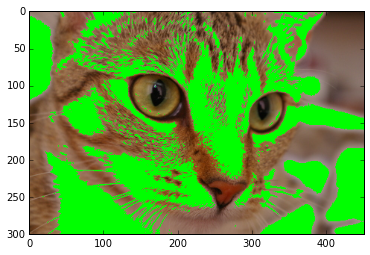

In [33]:
#mask对彩色图像同样适用
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
#显示图像
plt.imshow(cat)

###坐标约定
由于用数组表示图像，所以坐标必须要要匹配，左上角是（0，0）
索引一般是(rr,cc),(r,c),(row,col),要和(x,y)进行区分，xy表示的是笛卡尔坐标
在彩色图像中，最后一维是ch或channel

对于三维图像，例如：视频，MRI等图像，最开始的一个维度是plane，pln或者p

In [35]:
#很多函数可以直接操作3d图像
im3d = np.random.rand(100,1000,1000)
from skimage import morphology
from scipy import ndimage as nd
seeds = nd.label(im3d < 0.1)[0]
ws = morphology.watershed(im3d, seeds)

In [36]:
#在很多情况下，图像的某一维要低于其他两维，我们可以使用spacing进行处理
from skimage import segmentation
slics = segmentation.slic(im3d, spacing=[5, 1, 1], multichannel=False)

In [37]:
#在很多情况下，操作是基于平面的，但plane是第一维时，可以进行如下处理
#平面中所有图像的sobel算子
from skimage import filters
edges = np.zeros_like(im3d)
for pln, image in enumerate(im3d):
    edges[pln] = filters.sobel(image)

In [40]:
print slics.shape

(100L, 1000L, 1000L)


###数组的顺序
虽然数组的顺序是任意的但是，会影响到实际计算的效率。
###时间
虽然skimage暂时没有提供3D时变数据的处理，但是可以使用numpy5D数组进行处理